In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [2]:
cd

C:\Users\acer


In [4]:
train = pd.read_csv("train.csv")
train.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [5]:
train.shape

(233154, 41)

In [9]:
tr= train

In [53]:
tr.columns

Index(['disbursed_amount', 'asset_cost', 'ltv', 'branch_id', 'supplier_id',
       'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'loan_default'],
      dtype='object')

In [10]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
UniqueID                               233154 non-null int64
disbursed_amount                       233154 non-null int64
asset_cost                             233154 non-null int64
ltv                                    233154 non-null float64
branch_id                              233154 non-null int64
supplier_id                            233154 non-null int64
manufacturer_id                        233154 non-null int64
Current_pincode_ID                     233154 non-null int64
Date.of.Birth                          233154 non-null object
Employment.Type                        225493 non-null object
DisbursalDate                          233154 non-null object
State_ID                               233154 non-null int64
Employee_code_ID                       233154 non-null int64
MobileNo_Avl_Flag                      233154 non-null int64
Aadhar_flag                   

In [11]:
tr.set_index('UniqueID', inplace =True)

In [12]:
tr.head()

,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
UniqueID,,,,,,,,,,,,,,,,,,,,,
420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,03-08-18,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,26-09-18,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,01-08-18,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,26-10-18,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,26-09-18,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [13]:
#No. of defualts happened
tr.loan_default.sum()

50611

In [14]:
tr.get_value(624493, 'Employment.Type')

C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """Entry point for launching an IPython kernel.


'Self employed'

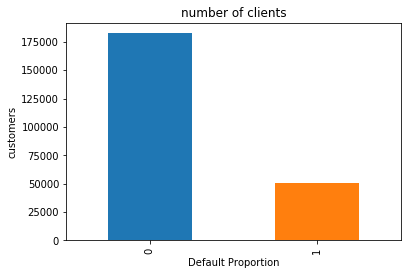

In [15]:
tr.loan_default.value_counts().plot.bar()
plt.xlabel('Default Proportion')
plt.ylabel('customers')
plt.title('number of clients')
plt.show()

In [16]:
test = pd.read_csv('test.csv')
test.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES
0,655269,53478,63558,86.54,67,22807,45,1497,01-01-74,Salaried,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
1,723482,55513,63163,89.45,67,22807,45,1497,20-05-85,Self employed,...,0,0,0,5605,0,1,0,0yrs 8mon,1yrs 0mon,1
2,758529,65282,84320,79.93,78,23135,86,2071,14-10-95,Salaried,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
3,763449,46905,63896,76.58,78,17014,45,2070,01-06-73,Self employed,...,0,0,0,0,0,0,0,2yrs 5mon,2yrs 5mon,0
4,708663,51428,63896,86.08,78,17014,45,2069,01-06-72,Salaried,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0


In [17]:
ts= test

In [18]:
ts.set_index('UniqueID', inplace =True)

In [19]:
ts.head()

,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,...,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES
UniqueID,,,,,,,,,,,,,,,,,,,,,
655269,53478,63558,86.54,67,22807,45,1497,01-01-74,Salaried,03-11-18,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
723482,55513,63163,89.45,67,22807,45,1497,20-05-85,Self employed,20-11-18,...,0,0,0,5605,0,1,0,0yrs 8mon,1yrs 0mon,1
758529,65282,84320,79.93,78,23135,86,2071,14-10-95,Salaried,29-11-18,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
763449,46905,63896,76.58,78,17014,45,2070,01-06-73,Self employed,29-11-18,...,0,0,0,0,0,0,0,2yrs 5mon,2yrs 5mon,0
708663,51428,63896,86.08,78,17014,45,2069,01-06-72,Salaried,17-11-18,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0


In [43]:
ts.columns

Index(['disbursed_amount', 'asset_cost', 'ltv', 'branch_id', 'supplier_id',
       'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES'],
      dtype='object')

In [20]:
tr.isnull().sum()


disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        7661
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                          0
PRI.OVERDUE.ACCTS               

In [26]:
ts.isnull().sum()

disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        3443
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                          0
PRI.OVERDUE.ACCTS               

In [27]:
tr['Employment.Type'].value_counts()

Self employed    127635
Salaried          97858
Name: Employment.Type, dtype: int64

In [28]:
ts['Employment.Type'].value_counts()

Self employed    59794
Salaried         49155
Name: Employment.Type, dtype: int64

In [29]:
tr.fillna('NAN',inplace=True)
ts.fillna('NAN',inplace=True)

In [30]:
tr['Employment.Type'].value_counts()

Self employed    127635
Salaried          97858
NAN                7661
Name: Employment.Type, dtype: int64

In [31]:
ts['Employment.Type'].value_counts()

Self employed    59794
Salaried         49155
NAN               3443
Name: Employment.Type, dtype: int64

In [32]:
missing_tr=[7661/len(tr)]
missing_tr

[0.0328581109481287]

Thus the missing values in train data is 3.28%

In [33]:
missing_ts=[3443/len(ts)]
missing_ts

[0.030633852943269983]

Thus the missing values in test data is 3.06%

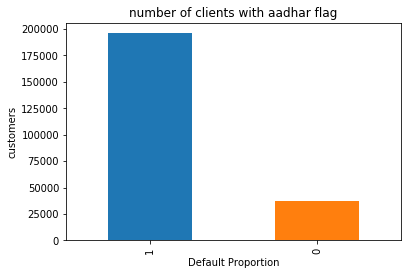

In [39]:
tr['Aadhar_flag'].value_counts().plot.bar()
plt.xlabel('Default Proportion')
plt.ylabel('customers')
plt.title('number of clients with aadhar flag')
plt.show()

###### checking for loan defaults made by customers who also had the redflag

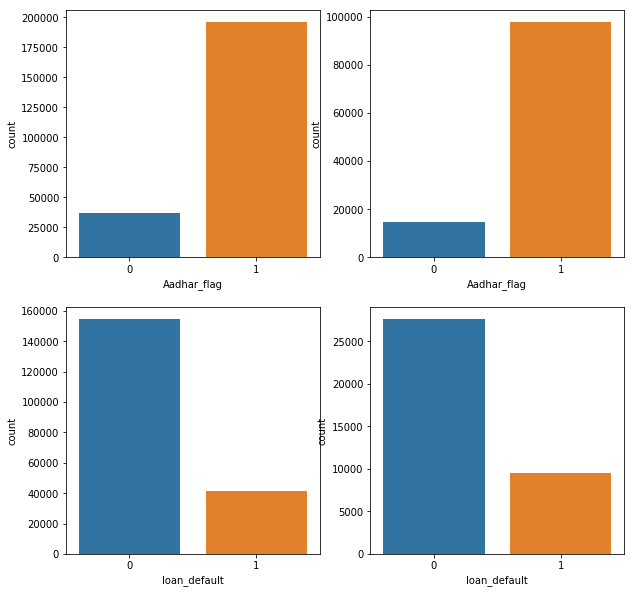

In [38]:
fig, ax =plt.subplots(2,2,figsize=(10, 10))
sns.countplot(tr['Aadhar_flag'], ax=ax[0,0])
sns.countplot(ts['Aadhar_flag'], ax=ax[0,1])
sns.countplot(tr[tr['Aadhar_flag']==1]['loan_default'], ax=ax[1,0])
sns.countplot(tr[tr['Aadhar_flag']==0]['loan_default'], ax=ax[1,1])

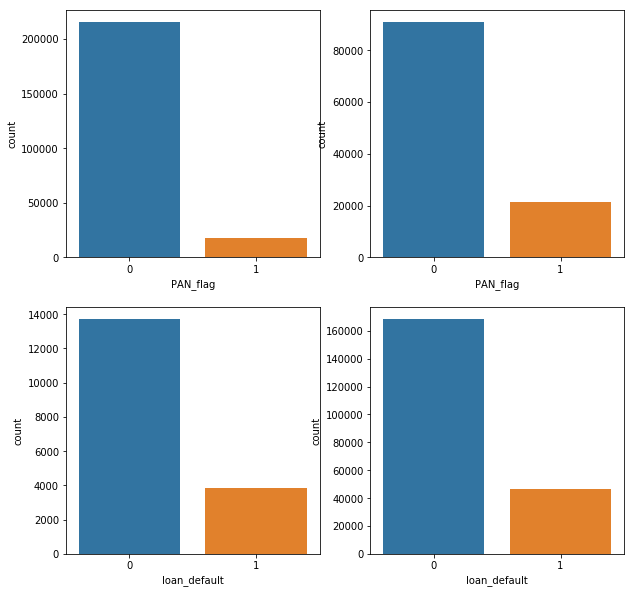

In [42]:
fig, ax =plt.subplots(2,2,figsize=(10, 10))
sns.countplot(tr['PAN_flag'], ax=ax[0,0])
sns.countplot(ts['PAN_flag'], ax=ax[0,1])
sns.countplot(tr[tr['PAN_flag']==1]['loan_default'], ax=ax[1,0])
sns.countplot(tr[tr['PAN_flag']==0]['loan_default'], ax=ax[1,1])

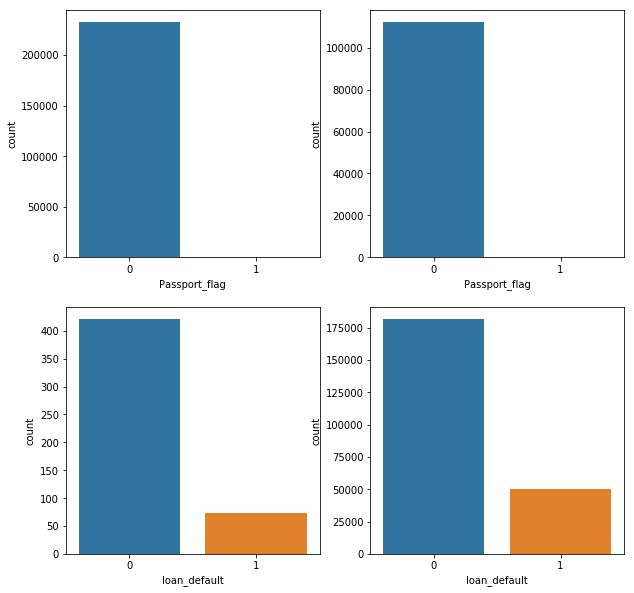

In [44]:
fig, ax =plt.subplots(2,2,figsize=(10, 10))
sns.countplot(tr['Passport_flag'], ax=ax[0,0])
sns.countplot(ts['Passport_flag'], ax=ax[0,1])
sns.countplot(tr[tr['Passport_flag']==1]['loan_default'], ax=ax[1,0])
sns.countplot(tr[tr['Passport_flag']==0]['loan_default'], ax=ax[1,1])

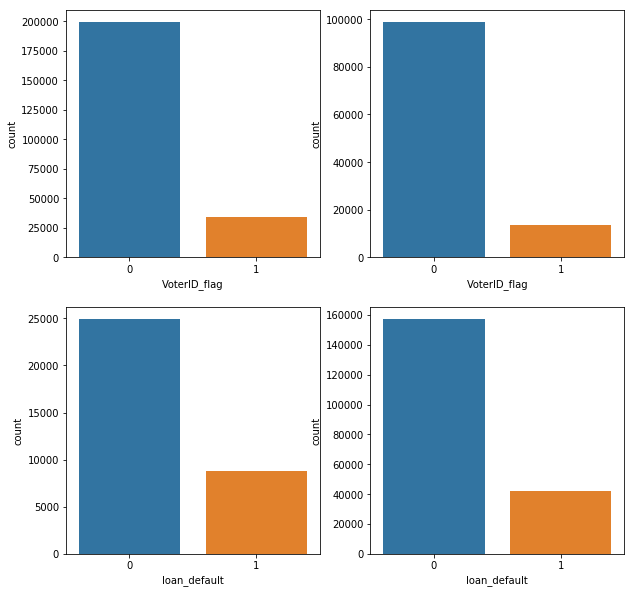

In [45]:
fig, ax =plt.subplots(2,2,figsize=(10, 10))
sns.countplot(tr['VoterID_flag'], ax=ax[0,0])
sns.countplot(ts['VoterID_flag'], ax=ax[0,1])
sns.countplot(tr[tr['VoterID_flag']==1]['loan_default'], ax=ax[1,0])
sns.countplot(tr[tr['VoterID_flag']==0]['loan_default'], ax=ax[1,1])

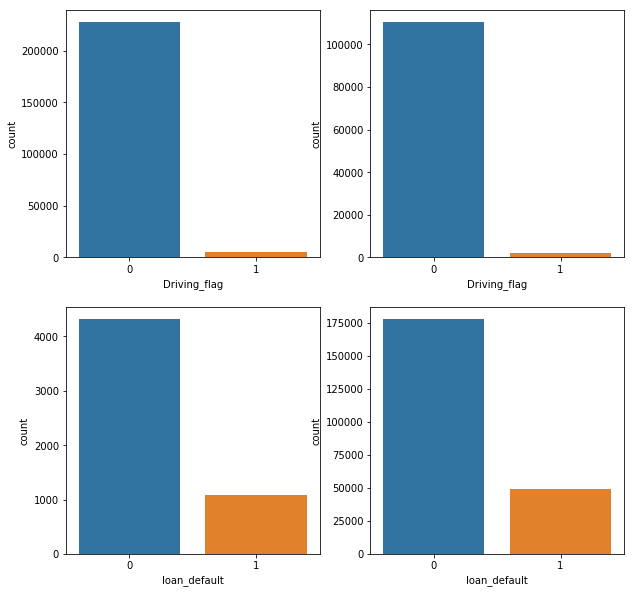

In [46]:
fig, ax =plt.subplots(2,2,figsize=(10, 10))
sns.countplot(tr['Driving_flag'], ax=ax[0,0])
sns.countplot(ts['Driving_flag'], ax=ax[0,1])
sns.countplot(tr[tr['Driving_flag']==1]['loan_default'], ax=ax[1,0])
sns.countplot(tr[tr['Driving_flag']==0]['loan_default'], ax=ax[1,1])

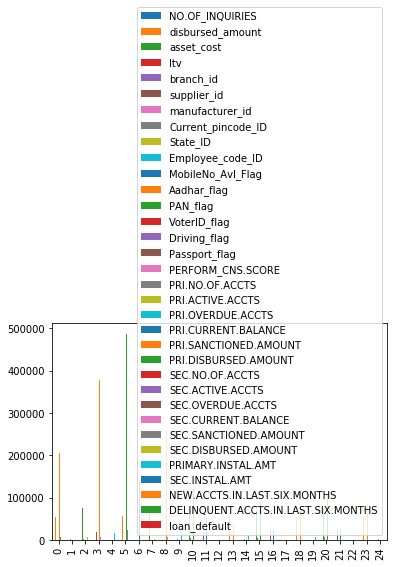

In [57]:
t = tr.groupby(["NO.OF_INQUIRIES"], as_index=None).mean()
t.plot(kind="bar")
plt.legend()

#### Now applying data wrangling on test dataset

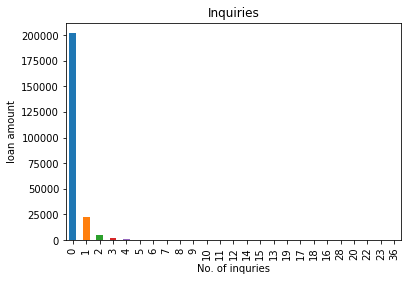

In [60]:
tr['NO.OF_INQUIRIES'].value_counts().plot.bar()

plt.xlabel('No. of inquries')
plt.ylabel('loan amount')
plt.title('Inquiries')
plt.show()

C:\Users\acer\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


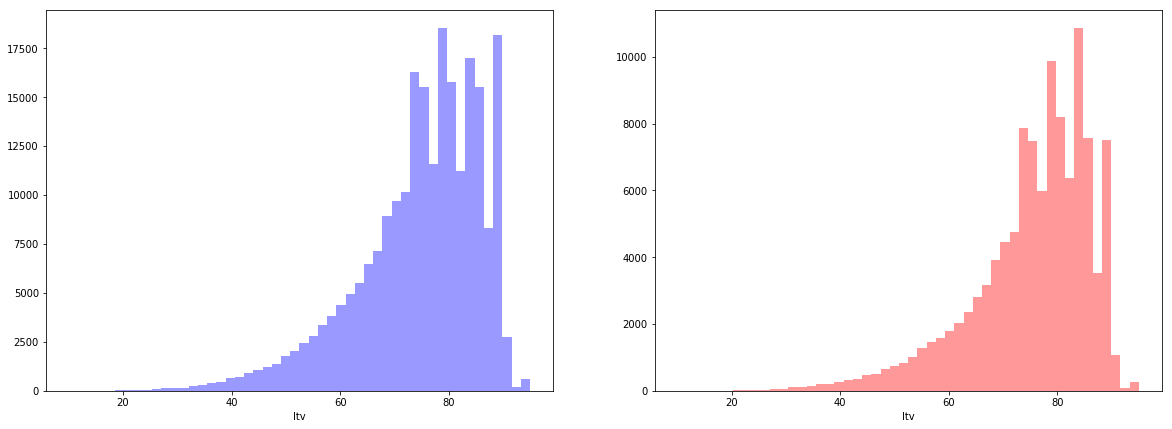

In [65]:
f, axes = plt.subplots(1,2 , figsize=(20, 7), sharex=True)
# sns.despine(left=True)
sns.distplot(train['ltv'],kde = False, color="b", ax=axes[0])
sns.distplot(test['ltv'],kde = False, color="r", ax=axes[1])
# train['ltv'].value_counts()

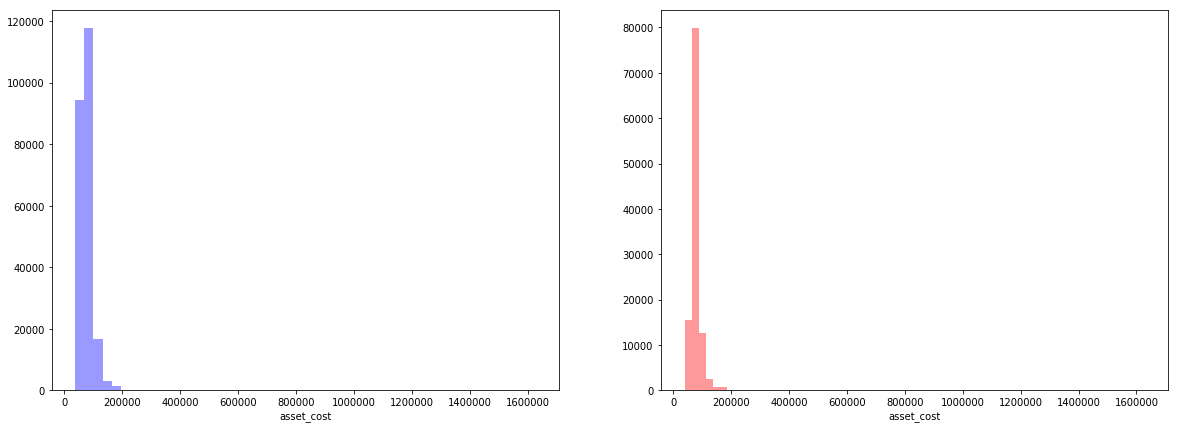

In [66]:
f, axes = plt.subplots(1,2 , figsize=(20, 7), sharex=True)
# sns.despine(left=True)
sns.distplot(train['asset_cost'],kde = False, color="b", ax=axes[0])
sns.distplot(test['asset_cost'],kde = False, color="r", ax=axes[1])


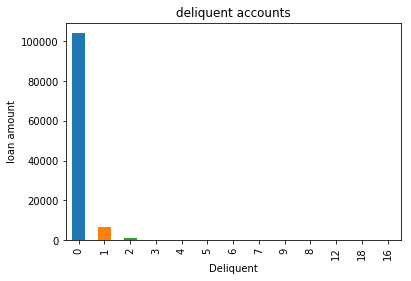

In [55]:
ts['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'].value_counts().plot.bar()

plt.xlabel('Deliquent')
plt.ylabel('loan amount')
plt.title('deliquent accounts')
plt.show()

In [39]:
a.shape

(233154, 40)

In [40]:
b.shape

(112392, 39)

In [21]:
test_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108949 entries, 0 to 112391
Data columns (total 40 columns):
UniqueID                               108949 non-null int64
disbursed_amount                       108949 non-null int64
asset_cost                             108949 non-null int64
ltv                                    108949 non-null float64
branch_id                              108949 non-null int64
supplier_id                            108949 non-null int64
manufacturer_id                        108949 non-null int64
Current_pincode_ID                     108949 non-null int64
Date.of.Birth                          108949 non-null object
Employment.Type                        108949 non-null object
DisbursalDate                          108949 non-null object
State_ID                               108949 non-null int64
Employee_code_ID                       108949 non-null int64
MobileNo_Avl_Flag                      108949 non-null int64
Aadhar_flag                   

In [22]:
test_copy.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES
0,655269,53478,63558,86.54,67,22807,45,1497,01-01-74,Salaried,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
1,723482,55513,63163,89.45,67,22807,45,1497,20-05-85,Self employed,...,0,0,0,5605,0,1,0,0yrs 8mon,1yrs 0mon,1
2,758529,65282,84320,79.93,78,23135,86,2071,14-10-95,Salaried,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
3,763449,46905,63896,76.58,78,17014,45,2070,01-06-73,Self employed,...,0,0,0,0,0,0,0,2yrs 5mon,2yrs 5mon,0
4,708663,51428,63896,86.08,78,17014,45,2069,01-06-72,Salaried,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0


In [23]:
#Setting the index as UniqueID
test_copy.set_index('UniqueID', inplace =True)


In [24]:
test_copy.head(10)

,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,...,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES
UniqueID,,,,,,,,,,,,,,,,,,,,,
655269,53478,63558,86.54,67,22807,45,1497,01-01-74,Salaried,03-11-18,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
723482,55513,63163,89.45,67,22807,45,1497,20-05-85,Self employed,20-11-18,...,0,0,0,5605,0,1,0,0yrs 8mon,1yrs 0mon,1
758529,65282,84320,79.93,78,23135,86,2071,14-10-95,Salaried,29-11-18,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
763449,46905,63896,76.58,78,17014,45,2070,01-06-73,Self employed,29-11-18,...,0,0,0,0,0,0,0,2yrs 5mon,2yrs 5mon,0
708663,51428,63896,86.08,78,17014,45,2069,01-06-72,Salaried,17-11-18,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
725530,57657,71211,84.64,78,17014,45,2103,01-01-68,Self employed,21-11-18,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1
708592,48518,62767,82.85,78,17014,45,2071,06-09-82,Salaried,17-11-18,...,0,0,0,2122,0,0,0,1yrs 7mon,2yrs 5mon,0
714975,48743,63896,81.38,78,17014,45,2079,24-11-95,Salaried,19-11-18,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
712795,50295,63896,82.35,78,17014,45,2071,01-01-88,Salaried,18-11-18,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0


In [25]:
#now creating the dictonary so that we can update the missing values using the codes provided
dictcopy= data_dict.copy()

In [26]:
dictcopy.head()

,Unnamed: 0,Variable Name,Description,Unnamed: 2
0,0,UniqueID,Identifier for customers,NaN
1,1,loan_default,Payment default in the first EMI on due date,NaN
2,2,disbursed_amount,Amount of Loan disbursed,NaN
3,3,asset_cost,Cost of the Asset,NaN
4,4,ltv,Loan to Value of the asset,NaN


##### Applying data wrangling on data_dict dataset

In [27]:
dictcopy.set_index('Unnamed: 0', inplace=True)

In [28]:
dictcopy.head()

,Variable Name,Description,Unnamed: 2
Unnamed: 0,,,
0,UniqueID,Identifier for customers,NaN
1,loan_default,Payment default in the first EMI on due date,NaN
2,disbursed_amount,Amount of Loan disbursed,NaN
3,asset_cost,Cost of the Asset,NaN
4,ltv,Loan to Value of the asset,NaN


In [39]:
#Applying pivot method to unmelt data, its going using unnamed: 2 but not unnmaed: 0
dictcopy_tidy = dictcopy.pivot(index='Unnamed: 0', columns='Variable Name', values='Description')

KeyError: 'Unnamed: 0'

In [35]:
dictcopy_tidy.head(5)

Variable Name,AVERAGE.ACCT.AGE,Aadhar_flag,CREDIT.HISTORY.LENGTH,Current_pincode,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,Date.of.Birth,DisbursalDate,Driving_flag,Employee_code_ID,Employment.Type,...,State_ID,UniqueID,VoterID_flag,asset_cost,branch_id,disbursed_amount,loan_default,ltv,manufacturer_id,supplier_id
Unnamed: 2,,,,,,,,,,,,,,,,,,,,,
NaN,Average loan tenure,if aadhar was shared by the customer then flag...,Time since first loan,Current pincode of the customer,Loans defaulted in the last 6 months,Date of birth of the customer,Date of disbursement,if DL was shared by the customer then flagged ...,Employee of the organization who logged the di...,Employment Type of the customer (Salaried/Self...,...,State of disbursement,Identifier for customers,if voter was shared by the customer then flag...,Cost of the Asset,Branch where the loan was disbursed,Amount of Loan disbursed,Payment default in the first EMI on due date,Loan to Value of the asset,"Vehicle manufacturer(Hero, Honda, TVS etc.)",Vehicle Dealer where the loan was disbursed
Primary accounts are those which the customer has taken for his personal use,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Secondary accounts are those which the customer act as a co-applicant or gaurantor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
